In [35]:
import numpy as np  
import matplotlib.pyplot as plt
import gymnasium as gym
import time
import os
from collections import defaultdict

In [36]:
def behaviour_policy(env):
  '''this is a random policy that returns a random action and a probability of 1/n for each action'''
  def policy(state):
    return np.random.choice(env.action_space.n), 1/env.action_space.n
  return policy

In [37]:
def generate_target_policy(epsilon,Q,env):
  '''this is an epsilon greedy policy returns action and probability of taking that action'''
  def policy(state):
    if state not in Q:
      #take any action with equal probability
      return np.random.choice(env.action_space.n), 1/env.action_space.n
    else:
      #take the best action with probability 1-epsilon
      if np.random.random() > epsilon:
        return np.argmax(Q[state]), 1-epsilon+epsilon/env.action_space.n
      else:
        return np.random.choice(env.action_space.n), epsilon/env.action_space.n
  return policy

In [38]:
def generate_episode(env, policy):
  episode = []
  state, _ = env.reset()
  done = False
  while not done:
    action, probability = policy(state)
    tup = env.step(action)
    next_state, reward, done = tup[0], tup[1], tup[2]
    episode.append((state, action, reward))
    state = next_state
  return episode

In [39]:
def mc_offpolicy(env, numeps, epsilon, gamma = 1.0):
  Q = defaultdict(lambda: np.zeros(env.action_space.n))
  C = defaultdict(lambda: np.zeros(env.action_space.n))
  
  target_policy = generate_target_policy(epsilon,Q,env)
  for i in range(numeps):
    if i % 10000 == 0:
      print(f'episode {i}')
    episode = generate_episode(env, behaviour_policy(env))
    G = 0
    W = 1
    for t in range(len(episode)-1, -1, -1):
      state, action, reward = episode[t]
      G = gamma*G + reward
      C[state][action] += W
      Q[state][action] += W/C[state][action]*(G - Q[state][action])
      prob_target = target_policy(state)[1]
      prob_behaviour = 1/env.action_space.n
      W *= prob_target/prob_behaviour
      if W <= 1e-9:
        break
      
  return Q, generate_target_policy(epsilon,Q,env)
      

In [ ]:
env = gym.make('Blackjack-v1', sab = True)
numeps = 500000
Q, policy = mc_offpolicy(env, numeps, 0.1, 1.0)
print(policy)


episode 0
episode 10000
episode 20000
episode 30000
episode 40000
episode 50000
episode 60000
episode 70000
episode 80000
episode 90000
episode 100000
episode 110000
episode 120000
episode 130000
episode 140000
episode 150000
episode 160000
episode 170000
episode 180000
episode 190000
episode 200000
episode 210000
episode 220000
episode 230000
episode 240000
episode 250000
episode 260000
episode 270000
episode 280000
episode 290000
episode 300000
episode 310000
episode 320000
episode 330000
episode 340000
episode 350000
episode 360000
episode 370000
episode 380000
episode 390000
episode 400000
episode 410000
episode 420000
episode 430000
episode 440000
episode 450000
episode 460000
episode 470000
episode 480000
episode 490000
<function generate_target_policy.<locals>.policy at 0x7f5dd8d64b80>


In [41]:
print(Q)


defaultdict(<function mc_offpolicy.<locals>.<lambda> at 0x7f5dd8d3bd90>, {(14, 8, 0): array([-0.53586066, -0.51237613]), (17, 10, 0): array([-0.44607245, -0.69386215]), (14, 2, 0): array([-0.33030303, -0.55602251]), (20, 10, 0): array([ 0.43232939, -0.87217475]), (19, 9, 0): array([ 0.27564825, -0.78945114]), (15, 9, 0): array([-0.53917526, -0.6076405 ]), (18, 2, 0): array([ 0.15278544, -0.70210736]), (17, 6, 0): array([-0.00109709, -0.60249003]), (10, 6, 0): array([-0.16894019, -0.2202147 ]), (16, 5, 0): array([-0.16371444, -0.59590032]), (20, 6, 0): array([ 0.69880907, -0.86059291]), (14, 6, 0): array([-0.14126016, -0.46516142]), (18, 6, 1): array([ 0.31446541, -0.1812906 ]), (13, 2, 0): array([-0.32987552, -0.53156903]), (11, 3, 0): array([-0.21499014, -0.27433966]), (17, 1, 0): array([-0.6811837 , -0.74937204]), (16, 3, 0): array([-0.27514635, -0.57866501]), (17, 8, 0): array([-0.36743674, -0.58792045]), (14, 7, 0): array([-0.44541261, -0.4962982 ]), (7, 6, 0): array([-0.10638298, 

In [43]:
#getting V from Q
V_noace = defaultdict(float)
V_ace = defaultdict(float)
for state, actions in Q.items():
  #if the player has an ace
  if state[2]:
    V_ace[state] = np.max(actions)
  else:
    V_noace[state] = np.max(actions)

print("V_noace: ", V_noace)
print("V_ace: ", V_ace)

V_noace:  defaultdict(<class 'float'>, {(14, 8, 0): np.float64(-0.5123761254903931), (17, 10, 0): np.float64(-0.44607244607244506), (14, 2, 0): np.float64(-0.3303030303030301), (20, 10, 0): np.float64(0.4323293938238651), (19, 9, 0): np.float64(0.2756482525366397), (15, 9, 0): np.float64(-0.5391752577319593), (18, 2, 0): np.float64(0.1527854384997241), (17, 6, 0): np.float64(-0.001097092704333522), (10, 6, 0): np.float64(-0.16894018887722972), (16, 5, 0): np.float64(-0.16371443907675753), (20, 6, 0): np.float64(0.698809066461775), (14, 6, 0): np.float64(-0.1412601626016256), (13, 2, 0): np.float64(-0.32987551867219905), (11, 3, 0): np.float64(-0.21499013806706097), (17, 1, 0): np.float64(-0.6811836962590737), (16, 3, 0): np.float64(-0.2751463544438536), (17, 8, 0): np.float64(-0.3674367436743679), (14, 7, 0): np.float64(-0.44541260891850354), (7, 6, 0): np.float64(-0.10638297872340416), (13, 7, 0): np.float64(-0.466512642274988), (8, 4, 0): np.float64(-0.19223985890652542), (20, 9, 0):

In [44]:
#plotting a 3D graph of the value function with respect to the player's sum and the dealer's showing card
player_scores = np.arange(12,22)
dealer_showing = np.arange(1,11)
print(player_scores), print(dealer_showing)
values_noace= np.zeros((len(player_scores),len(dealer_showing)))
values_ace= np.zeros((len(player_scores),len(dealer_showing)))
for i,player_score in enumerate(player_scores):
  for j,dealer_show in enumerate(dealer_showing):
    state = (player_score,dealer_show,False)
    if state in V_noace:
      values_noace[i,j] = V_noace[state]
      
    state = (player_score,dealer_show,True)
    if state in V_ace:
      values_ace[i,j] = V_ace[state]
    

[12 13 14 15 16 17 18 19 20 21]
[ 1  2  3  4  5  6  7  8  9 10]


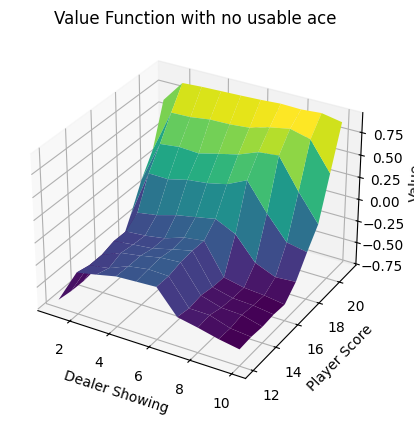

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(dealer_showing,player_scores) 
ax.plot_surface(X,Y,values_noace,rstride=1,cstride=1,cmap='viridis')  
ax.set_xlabel('Dealer Showing') 
ax.set_ylabel('Player Score')
ax.set_zlabel('Value')
ax.set_title('Value Function with no usable ace')
plt.show()  

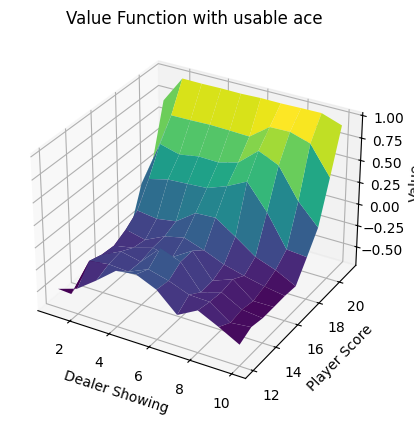

In [46]:
#plotting for usable ace
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(dealer_showing,player_scores)
ax.plot_surface(X,Y,values_ace,rstride=1,cstride=1,cmap='viridis')
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Score')
ax.set_zlabel('Value')
ax.set_title('Value Function with usable ace')
plt.show()
